In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the raw diabetes dataset from the URL

url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
data = pd.read_csv(url, sep="\t")

# Display column headers

print("Original column headers:")
print(list(data.columns))

Original column headers:
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']


In [ ]:
# Rename headers for clarity

new_columns = {'AGE' : 'Age', 'SEX' : 'Sex', 'BMI' : 'BMI', 'BP' : 'Blood Pressure', 'S1' : 'SerumCholesterol', 'S2' : 'SerumLDL', 'S3' : 'SerumHDL', 'S4' : 'SerumTCH', 'S5' : 'SerumLTG', 'S6' : 'SerumGlucose', 'Y' : 'DiseaseProgression'}

data.rename(columns=new_columns, inplace=True)

#Display top five rows
print("\n Top 5 rows of dataset")
print(data.head())


 Top 5 rows of dataset
   Age  Sex   BMI  Blood Pressure  SerumCholesterol  SerumLDL  SerumHDL  \
0   59    2  32.1           101.0               157      93.2      38.0   
1   48    1  21.6            87.0               183     103.2      70.0   
2   72    2  30.5            93.0               156      93.6      41.0   
3   24    1  25.3            84.0               198     131.4      40.0   
4   50    1  23.0           101.0               192     125.4      52.0   

   SerumTCH  SerumLTG  SerumGlucose  DiseaseProgression  
0       4.0    4.8598            87                 151  
1       3.0    3.8918            69                  75  
2       4.0    4.6728            85                 141  
3       5.0    4.8903            89                 206  
4       4.0    4.2905            80                 135  


In [ ]:
# Separate features (x) and target(y)

X = data.drop(columns = ['DiseaseProgression'])
Y= data['DiseaseProgression']

# Covert features to pandas DataFrame

pd_X = pd.DataFrame(X)

# Convert target to pandas Series for Display

pd_Y = pd.Series(Y)

#Display top 5 rows

print("\n Top 5 rows of Features")
print(pd_X.head())

print("\n Top 5 rows of Target")
print(pd_Y.head())


 Top 5 rows of Features
   Age  Sex   BMI  Blood Pressure  SerumCholesterol  SerumLDL  SerumHDL  \
0   59    2  32.1           101.0               157      93.2      38.0   
1   48    1  21.6            87.0               183     103.2      70.0   
2   72    2  30.5            93.0               156      93.6      41.0   
3   24    1  25.3            84.0               198     131.4      40.0   
4   50    1  23.0           101.0               192     125.4      52.0   

   SerumTCH  SerumLTG  SerumGlucose  
0       4.0    4.8598            87  
1       3.0    3.8918            69  
2       4.0    4.6728            85  
3       5.0    4.8903            89  
4       4.0    4.2905            80  

 Top 5 rows of Target
0    151
1     75
2    141
3    206
4    135
Name: DiseaseProgression, dtype: int64


In [13]:
# Check missing values
print('MIssing values: ', data.isnull().sum())
if data.isnull().sum().sum() == 0:
  print('No missing values found. ')

else:
  data = data,dropna()
  x = data.drop(columns = ['DiseaseProgression'])
  y = data['DiseaseProgression']

#Scale numerical features
numerical_cols = [col for col in X.columns if col != 'Sex']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print('\nFeature after scaling (Top 5 rows) :')
display(X.head())

MIssing values:  Age                   0
Sex                   0
BMI                   0
Blood Pressure        0
SerumCholesterol      0
SerumLDL              0
SerumHDL              0
SerumTCH              0
SerumLTG              0
SerumGlucose          0
DiseaseProgression    0
dtype: int64
No missing values found. 

Feature after scaling (Top 5 rows) :


Age  Sex       BMI  Blood Pressure  SerumCholesterol  SerumLDL  \
0  0.800500    2  1.297088        0.459841         -0.929746 -0.732065   
1 -0.039567    1 -1.082180       -0.553505         -0.177624 -0.402886   
2  1.793307    2  0.934533       -0.119214         -0.958674 -0.718897   
3 -1.872441    1 -0.243771       -0.770650          0.256292  0.525397   
4  0.113172    1 -0.764944        0.459841          0.082726  0.327890   

   SerumHDL  SerumTCH  SerumLTG  SerumGlucose  
0 -0.912451 -0.054499  0.418531     -0.370989  
1  1.564414 -0.830301 -1.436589     -1.938479  
2 -0.680245 -0.054499  0.060156     -0.545154  
3 -0.757647  0.721302  0.476983     -0.196823  
4  0.171178 -0.054499 -0.672502     -0.980568


Full Correlation Matrix:


Age       Sex       BMI  Blood Pressure  \
Age                 1.000000  0.173737  0.185085        0.335428   
Sex                 0.173737  1.000000  0.088161        0.241010   
BMI                 0.185085  0.088161  1.000000        0.395411   
Blood Pressure      0.335428  0.241010  0.395411        1.000000   
SerumCholesterol    0.260061  0.035277  0.249777        0.242464   
SerumLDL            0.219243  0.142637  0.261170        0.185548   
SerumHDL           -0.075181 -0.379090 -0.366811       -0.178762   
SerumTCH            0.203841  0.332115  0.413807        0.257650   
SerumLTG            0.270774  0.149916  0.446157        0.393480   
SerumGlucose        0.301731  0.208133  0.388680        0.390430   
DiseaseProgression  0.187889  0.043062  0.586450        0.441482   

                    SerumCholesterol  SerumLDL  SerumHDL  SerumTCH  SerumLTG  \
Age                         0.260061  0.219243 -0.075181  0.203841  0.270774   
Sex                         0.035277  0.142637 -0.379090  0.332115  0.149916   
BMI                         0.249777  0.261170 -0.366811  0.413807  0.446157   
Blood Pressure              0.242464  0.185548 -0.178762  0.257650  0.393480   
SerumCholesterol            1.000000  0.896663  0.051519  0.542207  0.515503   
SerumLDL                    0.896663  1.000000 -0.196455  0.659817  0.318357   
SerumHDL                    0.051519 -0.196455  1.000000 -0.738493 -0.398577   
SerumTCH                    0.542207  0.659817 -0.738493  1.000000  0.617859   
SerumLTG                    0.515503  0.318357 -0.398577  0.617859  1.000000   
SerumGlucose                0.325717  0.290600 -0.273697  0.417212  0.464669   
DiseaseProgression          0.212022  0.174054 -0.394789  0.430453  0.565883   

                    SerumGlucose  DiseaseProgression  
Age                     0.301731            0.187889  
Sex                     0.208133            0.043062  
BMI                     0.388680            0.586450  
Blood Pressure          0.390430            0.441482  
SerumCholesterol        0.325717            0.212022  
SerumLDL                0.290600            0.174054  
SerumHDL               -0.273697           -0.394789  
SerumTCH                0.417212            0.430453  
SerumLTG                0.464669            0.565883  
SerumGlucose            1.000000            0.382483  
DiseaseProgression      0.382483            1.000000

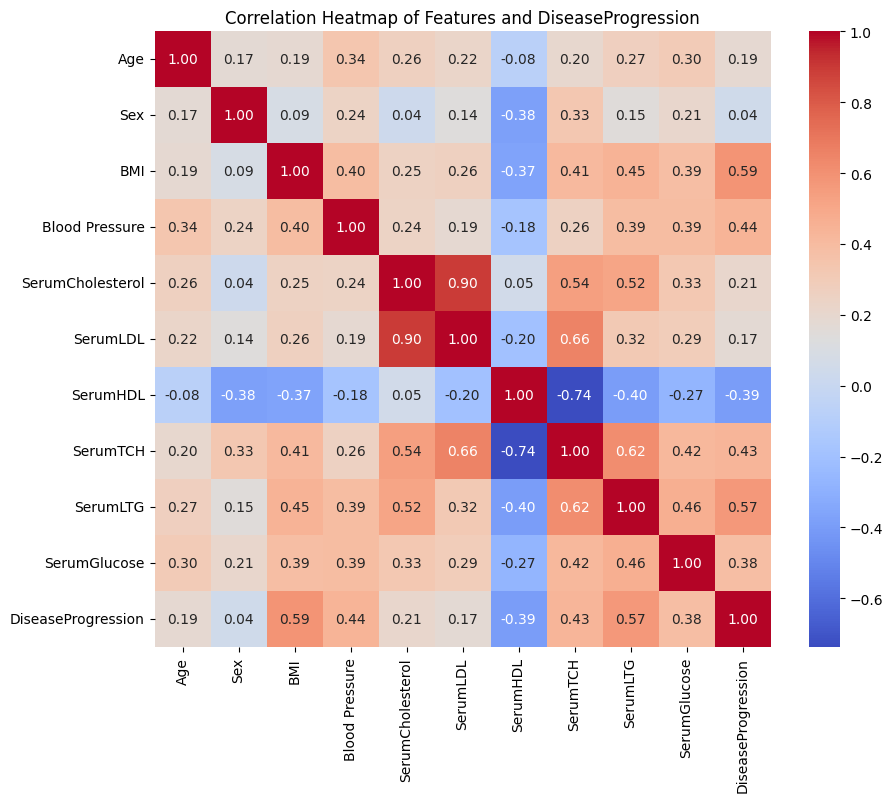

In [15]:
# Combine features and target for correlation
data_temp = X.copy()
data_temp['DiseaseProgression'] = Y
corr_matrix = data_temp.corr()

# Display the full correlation matrix
print("\nFull Correlation Matrix:")
display(corr_matrix)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Features and DiseaseProgression')
plt.show()

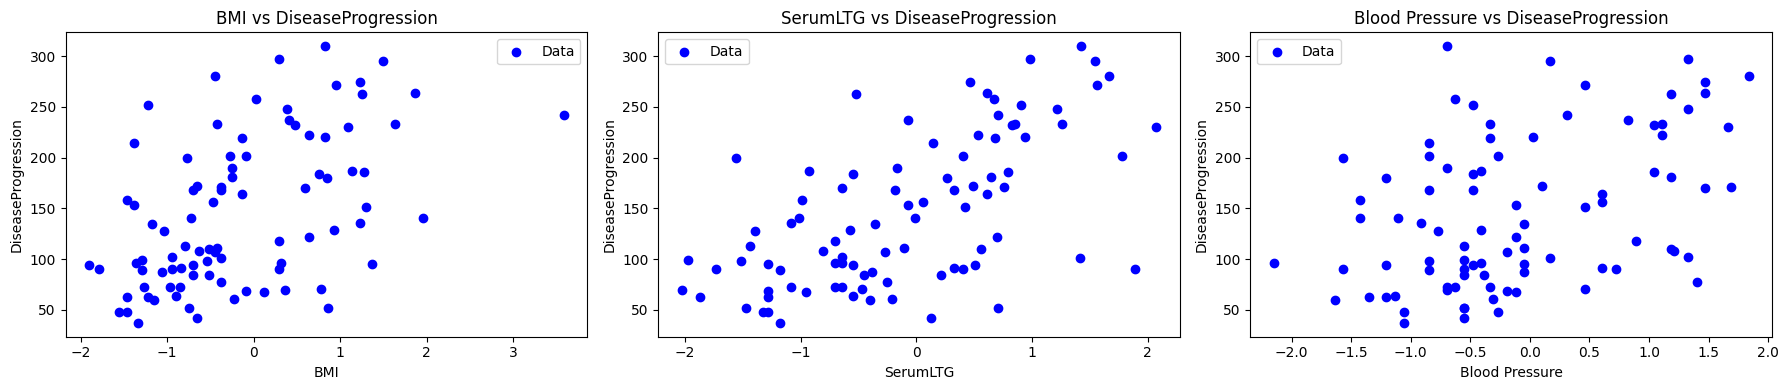

In [23]:
top_features = corr_matrix['DiseaseProgression'].abs().sort_values(ascending=False).index[1:4]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, feature in enumerate(top_features):
    ax = axes[i]
    ax.scatter(X_test[feature], y_test, color='blue', label='Data')
    ax.set_xlabel(feature)
    ax.set_ylabel('DiseaseProgression')
    ax.set_title(f'{feature} vs DiseaseProgression')
    ax.legend()
plt.tight_layout()
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training samples :  {len(X_train)}, Testing samples : {len(X_test)}")


Training samples :  353, Testing samples : 89


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
display("Model coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

'Model coefficients: '

array([  1.80291044, -23.06446772,  25.80070495,  16.53858529,
       -44.30640613,  24.64170961,   7.77309591,  13.09553713,
        35.01740872,   2.31502709])

Intercept:  185.2117573726955


In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R^2 Score: 0.45


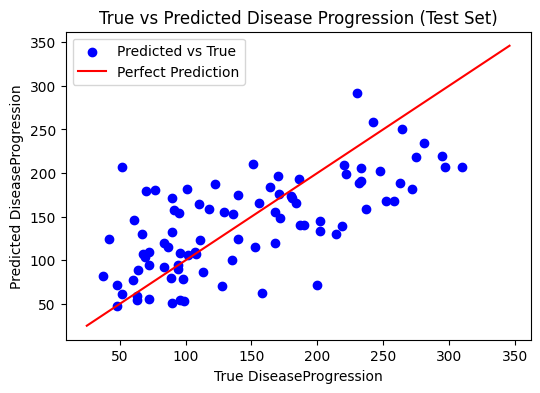

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r', label='Perfect Prediction')
plt.xlabel('True DiseaseProgression')
plt.ylabel('Predicted DiseaseProgression')
plt.title('True vs Predicted Disease Progression (Test Set)')
plt.legend()
plt.show()

In [30]:
# Simple Linear Regression with Highest Correlated Feature
highest_corr = corr_matrix['DiseaseProgression'].abs().sort_values(ascending=False).index[1]
X_train_single = X_train[[highest_corr]]
X_test_single = X_test[[highest_corr]]

simple_model = LinearRegression()
simple_model.fit(X_train_single, y_train)
y_pred_single = simple_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
rmse_single = np.sqrt(mse_single)
r2_single = r2_score(y_test, y_pred_single)
print(f"MSE: {mse_single:.2f}, R2: {r2_single:.2f}")
print(f"RMSE (using {highest_corr}): {rmse_single:.2f}")
print(f"R^2 Score: {r2_single:.2f}")

MSE: 4061.83, R2: 0.23
RMSE (using BMI): 63.73
R^2 Score: 0.23
